# Reactions of Glucose # 

In [1]:
import itertools

import rdkit
from rdkit import Chem
from IPython.core.interactiveshell import InteractiveShell

from stereomolgraph.graph import (
    StereoCondensedReactionGraph,
    StereoMolGraph,
    Tetrahedral,
    PlanarBond,
)

from stereomolgraph.ipython import View2D

InteractiveShell.ast_node_interactivity = "all"

View2D.show_atom_numbers = True
View2D.show_h = True
View2D.generate_bond_orders = False
View2D.height = 200
View2D.width = 1000

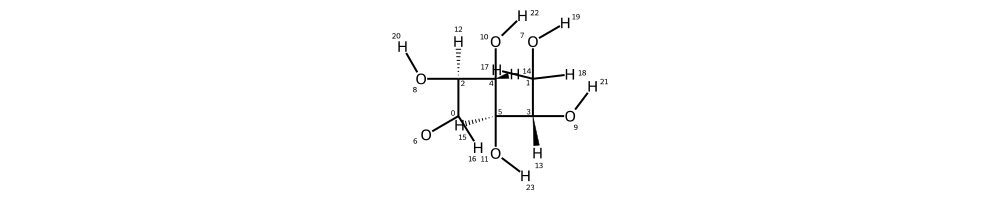

In [2]:
glucose_inchi = "InChI=1S/C6H12O6/c7-1-3(9)5(11)6(12)4(10)2-8/h1,3-6,8-12H,2H2/t3-,4+,5+,6+/m0/s1"
glucose_mol = rdkit.Chem.MolFromInchi(glucose_inchi, removeHs=False,)
scrg = StereoCondensedReactionGraph.from_rdmol(glucose_mol)
smg = StereoMolGraph.from_rdmol(glucose_mol)
smg

In [ ]:
dehyd = StereoCondensedReactionGraph()
dehyd.add_atom(0, "C")
dehyd.add_atom(1, "C")
dehyd.add_atom(2, "O")
dehyd.add_atom(3, "H")
dehyd.add_atom(4, "H")

dehyd.add_bond(0, 1)
dehyd.add_bond(2, 4)

dehyd.add_formed_bond(2, 3)

dehyd.add_broken_bond(0, 2)
dehyd.add_broken_bond(1, 3)

dehyd.set_atom_stereo_change(0, broken=Tetrahedral((0, 1, 2, 5, 6), 1))

dehyd.set_atom_stereo_change(1, broken= Tetrahedral((1, 0, 3, 7, 8), 1))

dehyd.set_bond_stereo_change((1,0), formed=PlanarBond((5,6,1,0,7,8)))

dehyd.stereo_changes

m, _ = dehyd._to_rdmol(generate_bond_orders=True)

mappingproxy({0: {BROKEN: Tetrahedral((0, 1, 2, 5, 6), 1)},
              1: {BROKEN: Tetrahedral((1, 0, 3, 7, 8), 1)},
              (0, 1): {FORMED: PlanarBond((5, 6, 1, 0, 7, 8), None)}})

NotImplementedError: Handling of missing atoms not supported yet

In [ ]:
r = dehyd.reactant()
p = dehyd.product()
r.stereo
r
p.stereo
p


In [ ]:
r

In [ ]:
p

In [ ]:
from  stereomolgraph.graph import StereoChange
self  = dehyd
ts_smg = StereoMolGraph(self) # bond change is now just a bond
for atom, stereo_change_dict in self.atom_stereo_changes.items():
            atom_stereo = next((stereo for stereo_change in (StereoChange.FLEETING,
                                                             StereoChange.BROKEN,
                                                             StereoChange.FORMED)
                                if (stereo := stereo_change_dict[stereo_change]) is not None), None)
            if atom_stereo:
                ts_smg.set_atom_stereo(atom, atom_stereo)

for bond, stereo_change_dict in self.bond_stereo_changes.items():
            bond_stereo = next((stereo for stereo_change in (StereoChange.FLEETING,
                                                             StereoChange.BROKEN,
                                                             StereoChange.FORMED)
                                if (stereo := stereo_change_dict[stereo_change]) is not None), None)
            if bond_stereo:
                ts_smg.set_bond_stereo(bond, bond_stereo)


In [ ]:
r
ts_smg
p

In [ ]:
ts_smg.atoms
ts_smg.bonds
ts_smg.stereo

In [ ]:
mol = ts_smg.to_mol(generate_bond_orders=False)

In [ ]:
mol

In [ ]:
scrg